#Lab 2: Regularisation, Momentum and Dropout

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras import regularizers
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns

pd.set_option('display.max_columns', None)
np.random.seed(42)
tf.random.set_seed(42)

#Importing data

Dataset is also included in the sample data in colab

In [6]:
df_train = pd.read_csv('ChurnBank.csv')

In [7]:
df_train.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [8]:
df_train.shape

(30000, 25)

#Underfit vs Overfit
####Read: bias vs variance tradeoff (self study)
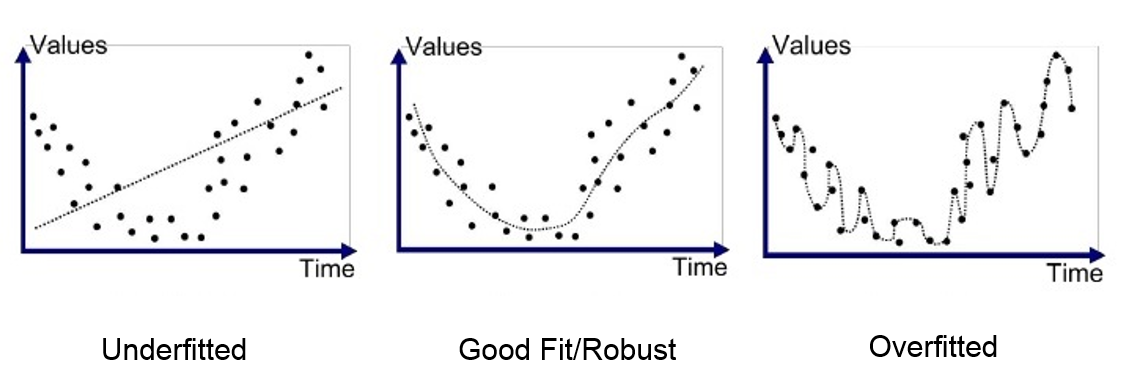

In [10]:
# Plot the chart for accuracy and loss on both training and validation
def plot_graphs(history):
    %matplotlib inline
    import matplotlib.pyplot as plt
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'r', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Val accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()

    plt.plot(epochs, loss, 'r', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Val Loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

In [11]:
X = df_train[['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
y = df_train['default payment next month']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True)

scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [17]:
X_train

array([[-1.41691347, -0.67612826,  0.80977982, ..., -0.15012689,
        -0.1836137 , -0.17231568],
       [-1.44600654, -1.06018591, -1.23490358, ..., -0.2547546 ,
        -0.31060489, -0.29772386],
       [-0.70494143, -1.13699744,  0.80977982, ..., -0.25605918,
        -0.2426646 ,  1.98242491],
       ...,
       [ 1.30005591, -0.75293979,  0.80977982, ..., -0.18300243,
        -0.1836137 , -0.18371642],
       [ 0.2554762 , -1.21380897,  0.80977982, ..., -0.15723687,
        -0.31060489, -0.29772386],
       [ 0.48348735,  0.0151755 ,  0.80977982, ..., -0.06376336,
        -0.06659132, -0.07660644]])

#Regularisation

###Vanilla Model

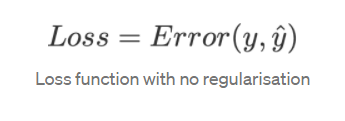

In [18]:
model_vanilla = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(24,)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')]
    )
#softmax activation
model_vanilla.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                400       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 545
Trainable params: 545
Non-trainable params: 0
_________________________________________________________________


In [19]:
model_vanilla.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')
history = model_vanilla.fit(X_train, y_train.values, epochs=20, verbose=2, validation_data=(X_test, y_test))

Epoch 1/20
750/750 - 2s - loss: 0.4922 - accuracy: 0.7995 - val_loss: 0.4695 - val_accuracy: 0.8028
Epoch 2/20
750/750 - 1s - loss: 0.4490 - accuracy: 0.8184 - val_loss: 0.4590 - val_accuracy: 0.8055
Epoch 3/20
750/750 - 1s - loss: 0.4406 - accuracy: 0.8213 - val_loss: 0.4540 - val_accuracy: 0.8108
Epoch 4/20
750/750 - 1s - loss: 0.4361 - accuracy: 0.8216 - val_loss: 0.4541 - val_accuracy: 0.8077
Epoch 5/20
750/750 - 1s - loss: 0.4334 - accuracy: 0.8208 - val_loss: 0.4496 - val_accuracy: 0.8128
Epoch 6/20
750/750 - 1s - loss: 0.4317 - accuracy: 0.8231 - val_loss: 0.4494 - val_accuracy: 0.8098
Epoch 7/20
750/750 - 1s - loss: 0.4299 - accuracy: 0.8230 - val_loss: 0.4484 - val_accuracy: 0.8128
Epoch 8/20
750/750 - 1s - loss: 0.4285 - accuracy: 0.8229 - val_loss: 0.4485 - val_accuracy: 0.8100
Epoch 9/20
750/750 - 1s - loss: 0.4281 - accuracy: 0.8225 - val_loss: 0.4470 - val_accuracy: 0.8122
Epoch 10/20
750/750 - 1s - loss: 0.4270 - accuracy: 0.8235 - val_loss: 0.4476 - val_accuracy: 0.8097

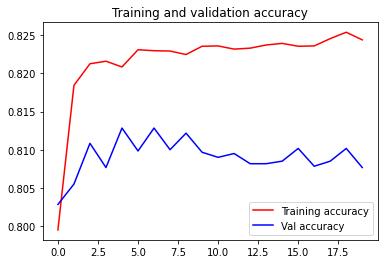

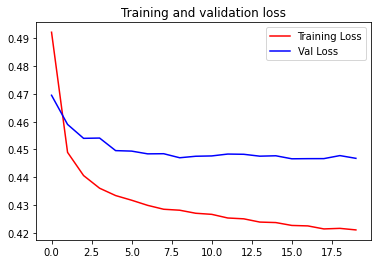

In [20]:
plot_graphs(history)

###L1 regularisation

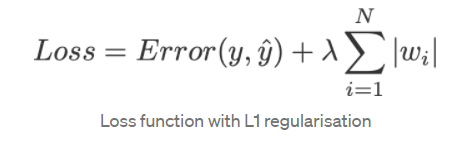

In [21]:
model_regularised_l1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(24,)),
    tf.keras.layers.Dense(8, activation='relu', kernel_regularizer=regularizers.l1(0.05)),
    tf.keras.layers.Dense(1, activation='sigmoid')]
    )

model_regularised_l1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                400       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 545
Trainable params: 545
Non-trainable params: 0
_________________________________________________________________


In [22]:
model_regularised_l1.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')
history = model_regularised_l1.fit(X_train, y_train.values, epochs=20, verbose=2, validation_data=(X_test, y_test))

Epoch 1/20
750/750 - 1s - loss: 0.9156 - accuracy: 0.7737 - val_loss: 0.5184 - val_accuracy: 0.7718
Epoch 2/20
750/750 - 1s - loss: 0.4943 - accuracy: 0.7805 - val_loss: 0.5000 - val_accuracy: 0.7718
Epoch 3/20
750/750 - 1s - loss: 0.4820 - accuracy: 0.7805 - val_loss: 0.4911 - val_accuracy: 0.7718
Epoch 4/20
750/750 - 1s - loss: 0.4730 - accuracy: 0.8086 - val_loss: 0.4856 - val_accuracy: 0.8005
Epoch 5/20
750/750 - 1s - loss: 0.4688 - accuracy: 0.8110 - val_loss: 0.4816 - val_accuracy: 0.8002
Epoch 6/20
750/750 - 1s - loss: 0.4652 - accuracy: 0.8128 - val_loss: 0.4775 - val_accuracy: 0.8002
Epoch 7/20
750/750 - 1s - loss: 0.4613 - accuracy: 0.8148 - val_loss: 0.4740 - val_accuracy: 0.8022
Epoch 8/20
750/750 - 1s - loss: 0.4584 - accuracy: 0.8165 - val_loss: 0.4730 - val_accuracy: 0.8047
Epoch 9/20
750/750 - 1s - loss: 0.4570 - accuracy: 0.8168 - val_loss: 0.4714 - val_accuracy: 0.8045
Epoch 10/20
750/750 - 1s - loss: 0.4552 - accuracy: 0.8175 - val_loss: 0.4713 - val_accuracy: 0.8042

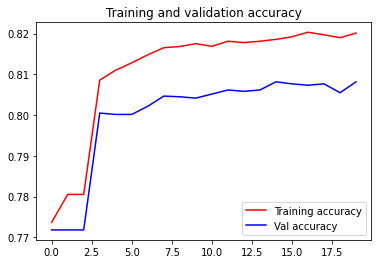

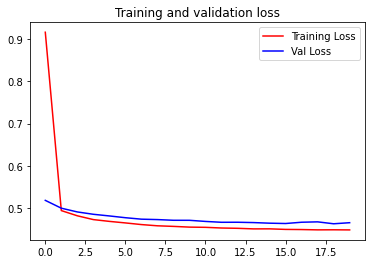

In [23]:
plot_graphs(history)

###L2 regularisation

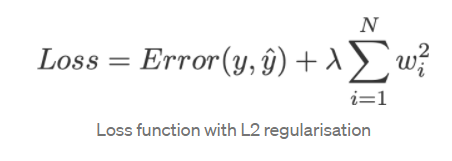


In [24]:
model_regularised_l2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(24,), kernel_regularizer=regularizers.l2(0.05)),
    tf.keras.layers.Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.05)),
    tf.keras.layers.Dense(1, activation='sigmoid')]
    )

model_regularised_l2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                400       
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 9         
Total params: 545
Trainable params: 545
Non-trainable params: 0
_________________________________________________________________


In [25]:
model_regularised_l2.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')
history = model_regularised_l2.fit(X_train, y_train.values, epochs=20, verbose=2, validation_data=(X_test, y_test))

Epoch 1/20
750/750 - 1s - loss: 0.8489 - accuracy: 0.7680 - val_loss: 0.5124 - val_accuracy: 0.7855
Epoch 2/20
750/750 - 1s - loss: 0.4922 - accuracy: 0.8033 - val_loss: 0.5015 - val_accuracy: 0.7942
Epoch 3/20
750/750 - 1s - loss: 0.4856 - accuracy: 0.8055 - val_loss: 0.4938 - val_accuracy: 0.7968
Epoch 4/20
750/750 - 1s - loss: 0.4818 - accuracy: 0.8065 - val_loss: 0.4934 - val_accuracy: 0.7997
Epoch 5/20
750/750 - 1s - loss: 0.4795 - accuracy: 0.8084 - val_loss: 0.4901 - val_accuracy: 0.7998
Epoch 6/20
750/750 - 1s - loss: 0.4777 - accuracy: 0.8080 - val_loss: 0.4881 - val_accuracy: 0.7987
Epoch 7/20
750/750 - 1s - loss: 0.4762 - accuracy: 0.8089 - val_loss: 0.4868 - val_accuracy: 0.7995
Epoch 8/20
750/750 - 1s - loss: 0.4745 - accuracy: 0.8085 - val_loss: 0.4865 - val_accuracy: 0.8010
Epoch 9/20
750/750 - 1s - loss: 0.4736 - accuracy: 0.8119 - val_loss: 0.4855 - val_accuracy: 0.7988
Epoch 10/20
750/750 - 1s - loss: 0.4724 - accuracy: 0.8113 - val_loss: 0.4834 - val_accuracy: 0.8022

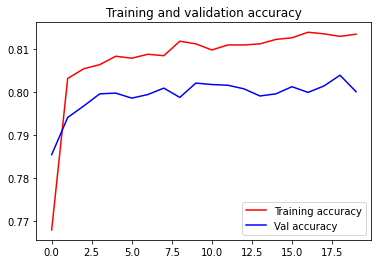

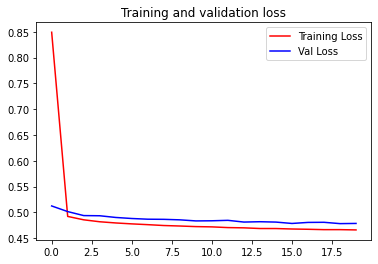

In [26]:
plot_graphs(history)

#Dropout

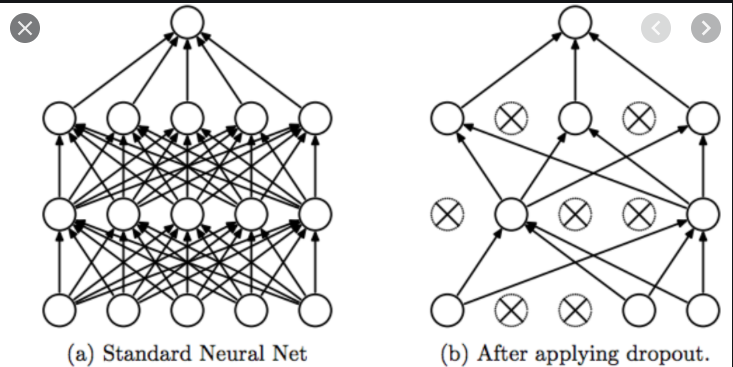

In [27]:
model_dropout = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape = (24,)),
    tf.keras.layers.Dropout(0.125),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dropout(0.125),
    tf.keras.layers.Dense(1, activation='sigmoid')]
    )

model_dropout.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 16)                400       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 9         
Total params: 545
Trainable params: 545
Non-trainable params: 0
_________________________________________________________________


In [28]:
model_dropout.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')
history = model_dropout.fit(X_train, y_train.values, epochs=20, verbose=2, validation_data=(X_test, y_test))

Epoch 1/20
750/750 - 1s - loss: 0.5134 - accuracy: 0.7863 - val_loss: 0.4717 - val_accuracy: 0.8007
Epoch 2/20
750/750 - 1s - loss: 0.4699 - accuracy: 0.8074 - val_loss: 0.4601 - val_accuracy: 0.8015
Epoch 3/20
750/750 - 1s - loss: 0.4557 - accuracy: 0.8096 - val_loss: 0.4546 - val_accuracy: 0.7998
Epoch 4/20
750/750 - 1s - loss: 0.4497 - accuracy: 0.8123 - val_loss: 0.4518 - val_accuracy: 0.8075
Epoch 5/20
750/750 - 1s - loss: 0.4455 - accuracy: 0.8141 - val_loss: 0.4510 - val_accuracy: 0.8072
Epoch 6/20
750/750 - 1s - loss: 0.4447 - accuracy: 0.8148 - val_loss: 0.4494 - val_accuracy: 0.8082
Epoch 7/20
750/750 - 1s - loss: 0.4418 - accuracy: 0.8173 - val_loss: 0.4479 - val_accuracy: 0.8095
Epoch 8/20
750/750 - 1s - loss: 0.4396 - accuracy: 0.8160 - val_loss: 0.4470 - val_accuracy: 0.8082
Epoch 9/20
750/750 - 1s - loss: 0.4406 - accuracy: 0.8174 - val_loss: 0.4464 - val_accuracy: 0.8077
Epoch 10/20
750/750 - 1s - loss: 0.4390 - accuracy: 0.8181 - val_loss: 0.4465 - val_accuracy: 0.8093

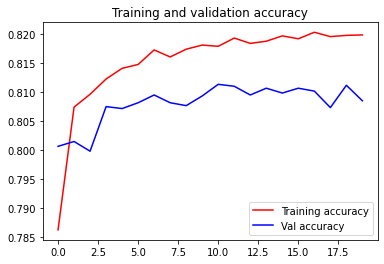

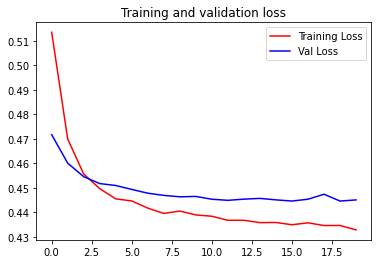

In [29]:
plot_graphs(history)

#Momentum

https://machinelearningmastery.com/understand-the-dynamics-of-learning-rate-on-deep-learning-neural-networks/

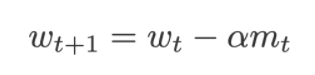

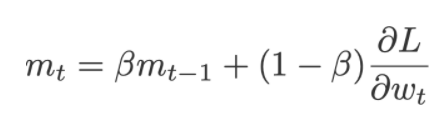

In [30]:
model_momentum = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(24,)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')]
    )

model_momentum.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 16)                400       
_________________________________________________________________
dense_13 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 9         
Total params: 545
Trainable params: 545
Non-trainable params: 0
_________________________________________________________________


In [31]:
opt = tf.keras.optimizers.SGD(learning_rate=0.05, momentum=0.9)

model_momentum.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=opt)
history = model_momentum.fit(X_train, y_train.values, epochs=20, verbose=2, validation_data=(X_test, y_test))

Epoch 1/20
750/750 - 1s - loss: 0.4577 - accuracy: 0.8100 - val_loss: 0.4678 - val_accuracy: 0.8070
Epoch 2/20
750/750 - 1s - loss: 0.4421 - accuracy: 0.8170 - val_loss: 0.4584 - val_accuracy: 0.8028
Epoch 3/20
750/750 - 1s - loss: 0.4386 - accuracy: 0.8175 - val_loss: 0.4484 - val_accuracy: 0.8108
Epoch 4/20
750/750 - 1s - loss: 0.4347 - accuracy: 0.8192 - val_loss: 0.4516 - val_accuracy: 0.8113
Epoch 5/20
750/750 - 1s - loss: 0.4340 - accuracy: 0.8187 - val_loss: 0.4575 - val_accuracy: 0.8120
Epoch 6/20
750/750 - 1s - loss: 0.4332 - accuracy: 0.8192 - val_loss: 0.4657 - val_accuracy: 0.7987
Epoch 7/20
750/750 - 1s - loss: 0.4325 - accuracy: 0.8188 - val_loss: 0.4517 - val_accuracy: 0.7975
Epoch 8/20
750/750 - 1s - loss: 0.4300 - accuracy: 0.8203 - val_loss: 0.4548 - val_accuracy: 0.8108
Epoch 9/20
750/750 - 1s - loss: 0.4299 - accuracy: 0.8206 - val_loss: 0.4575 - val_accuracy: 0.7823
Epoch 10/20
750/750 - 1s - loss: 0.4286 - accuracy: 0.8208 - val_loss: 0.4532 - val_accuracy: 0.8085

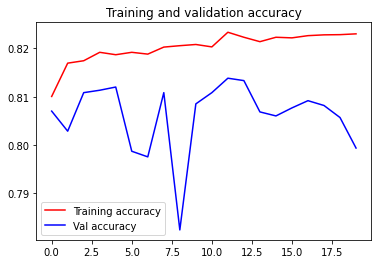

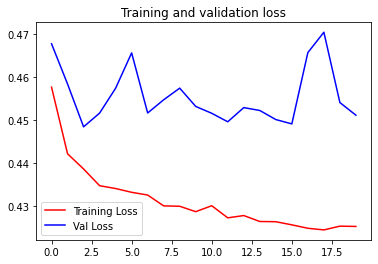

In [32]:
plot_graphs(history)